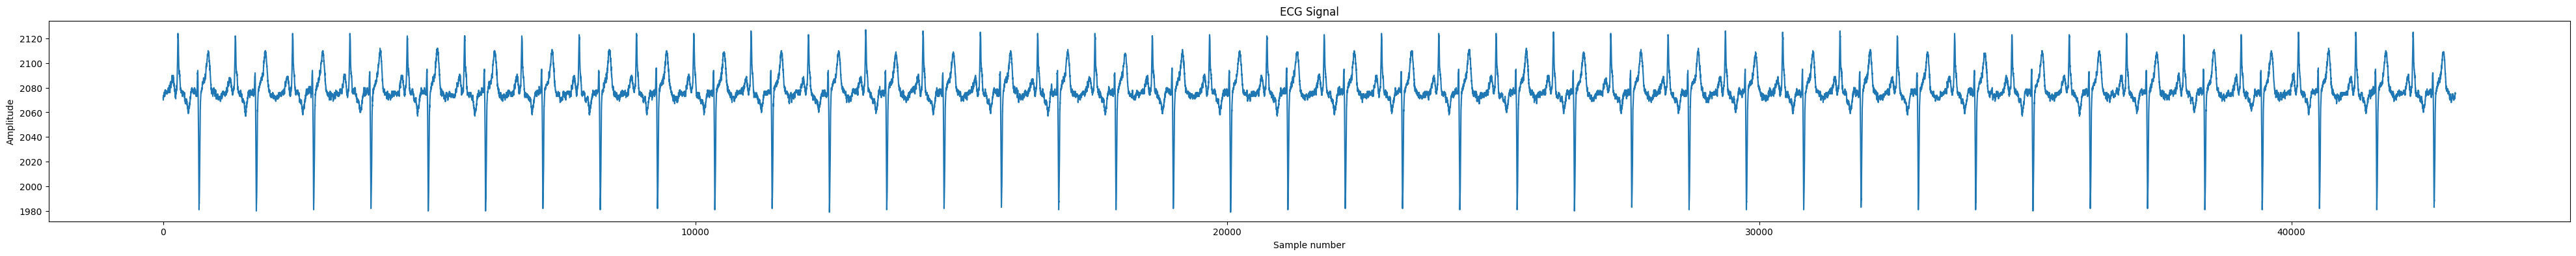

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
# Replace with the path to your .dat file
file_path = r'C:\Users\mohit\OneDrive\Desktop\remove_background\ecg\dataset\aami3a.dat'


data = np.fromfile(file_path, dtype=np.int16)


plt.figure(figsize=(50, 4))
plt.plot(data)
plt.title('ECG Signal')
plt.ylabel('Amplitude')
plt.xlabel('Sample number')
plt.show()

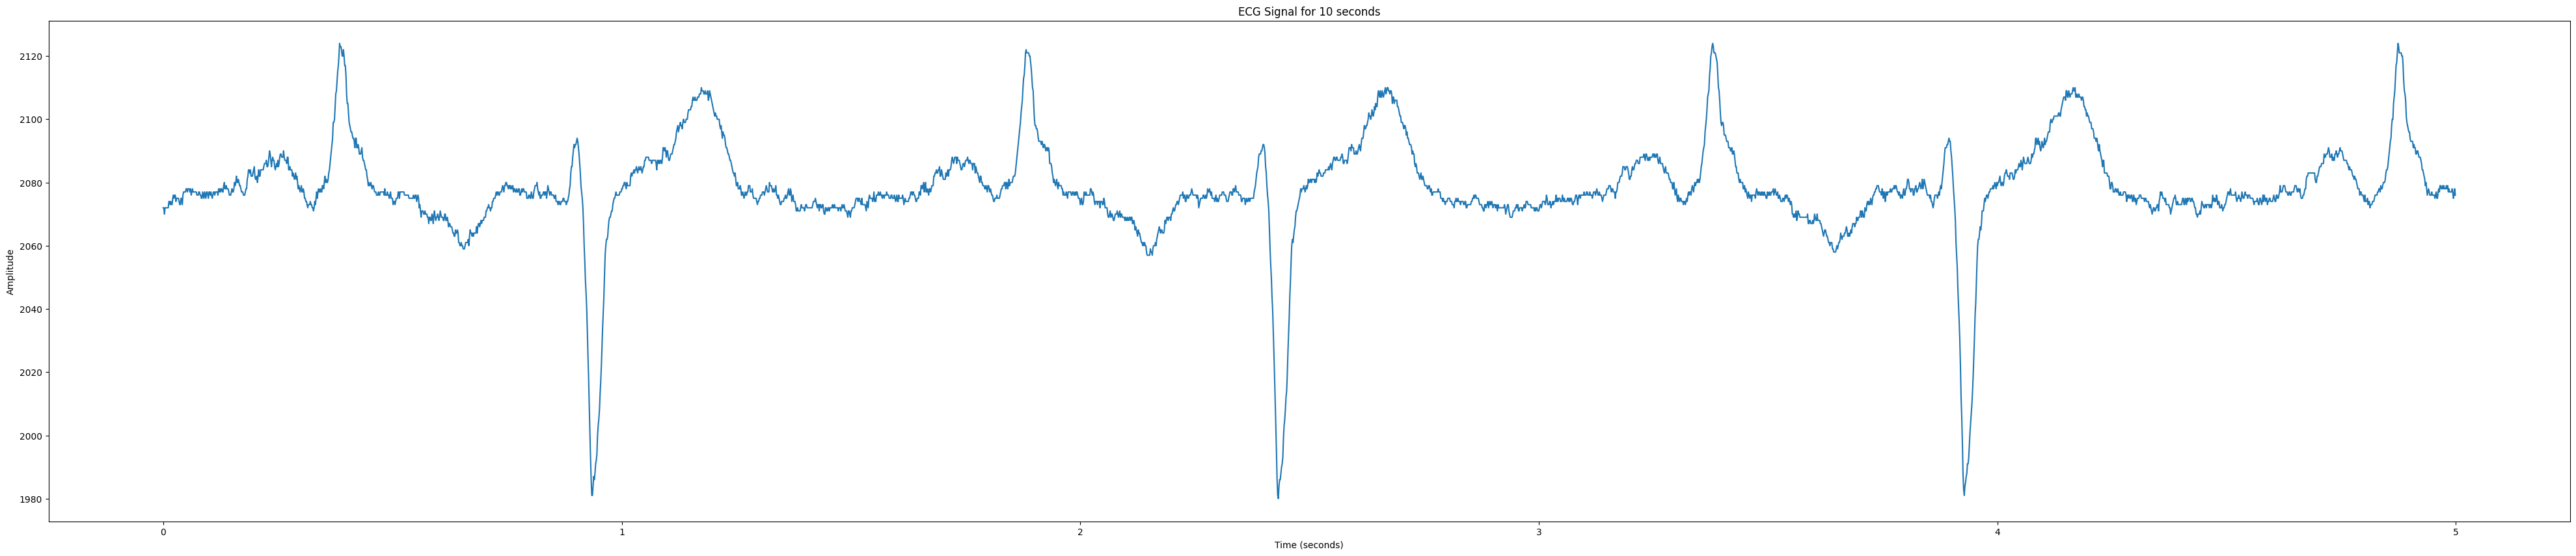

In [8]:

# Sampling frequency (in Hz)
fs = 720

# Time duration you want to view (in seconds)
duration = 5

# Calculate the number of samples to view
n_samples = fs * duration

# Select only the first n_samples samples from the data
subset = data[:n_samples]

# Plot the data
plt.figure(figsize=(50, 10))
plt.plot(np.arange(n_samples)/fs, subset)  # x values are in seconds now
plt.title('ECG Signal for 10 seconds')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.show()

In [9]:
#cleaning the Data

In [11]:
ecg_cleaned = nk.ecg_clean(data, sampling_rate=fs)

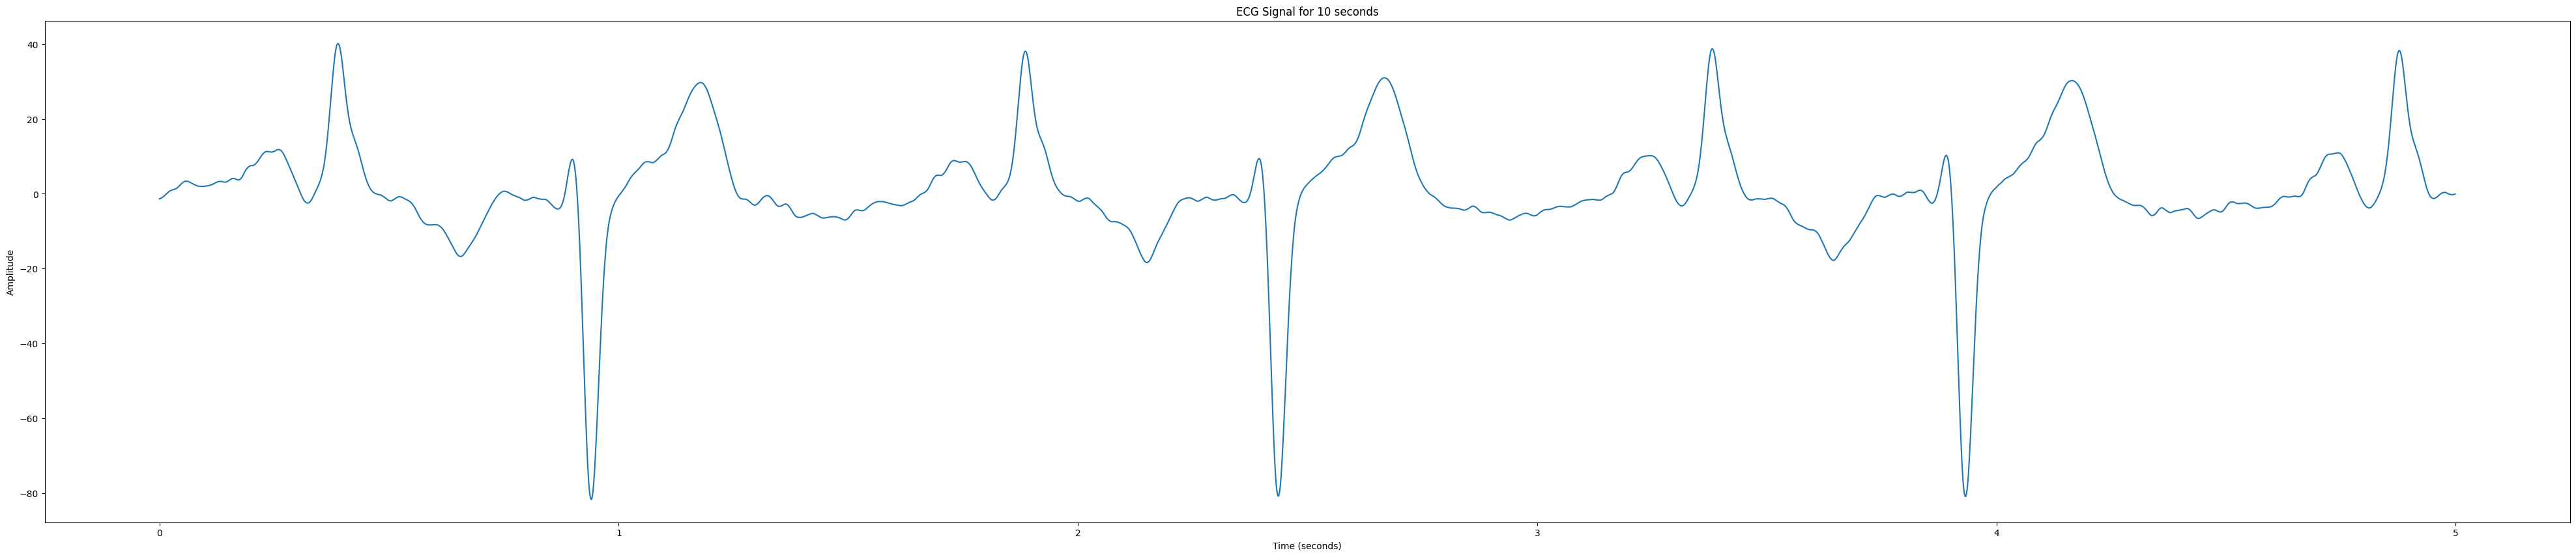

In [12]:

# Sampling frequency (in Hz)
fs = 720

# Time duration you want to view (in seconds)
duration = 5

# Calculate the number of samples to view
n_samples = fs * duration

# Select only the first n_samples samples from the data
subset = ecg_cleaned[:n_samples]

# Plot the data
plt.figure(figsize=(50, 10))
plt.plot(np.arange(n_samples)/fs, subset)  # x values are in seconds now
plt.title('ECG Signal for 10 seconds')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.show()

In [13]:

# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=fs)

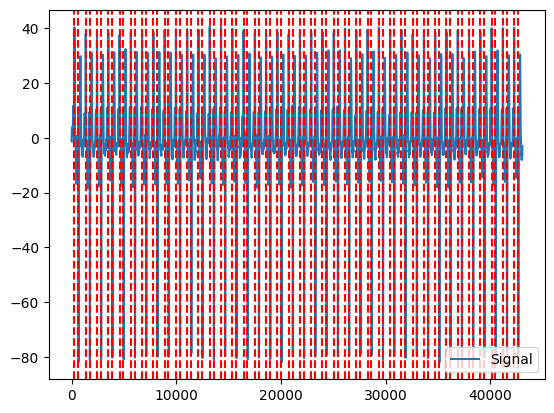

In [14]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_cleaned)

In [15]:
rpeaks

{'ECG_R_Peaks': array([  280,   647,  1358,  1724,  2434,  2801,  3512,  3878,  4589,
         4955,  5666,  6033,  6743,  7110,  7820,  8187,  8897,  9264,
         9975, 10341, 11051, 11418, 12128, 12496, 13206, 13573, 14283,
        14650, 15360, 15727, 16437, 16804, 17514, 17881, 18591, 18959,
        19668, 20035, 20746, 21113, 21822, 22190, 22900, 23266, 23977,
        24344, 25054, 25421, 26131, 26498, 27208, 27575, 28285, 28652,
        29362, 29729, 30440, 30807, 31517, 31884, 32594, 32961, 33671,
        34038, 34748, 35115, 35825, 36193, 36902, 37269, 37979, 38346,
        39056, 39423, 40133, 40501, 41211, 41577, 42288, 42655]),
 'sampling_rate': 720}

In [16]:
rpeaks = rpeaks['ECG_R_Peaks']

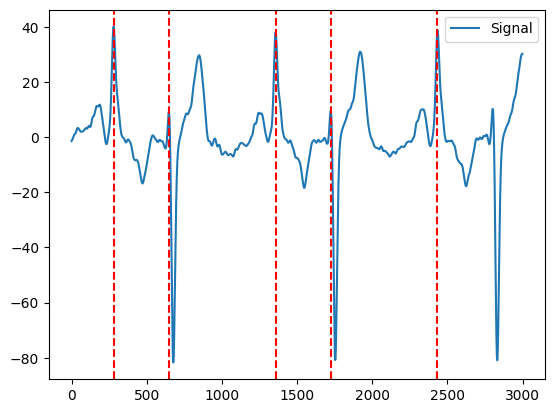

In [18]:
# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks[:5], ecg_cleaned[:3000])

In [19]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=fs, method="peak")

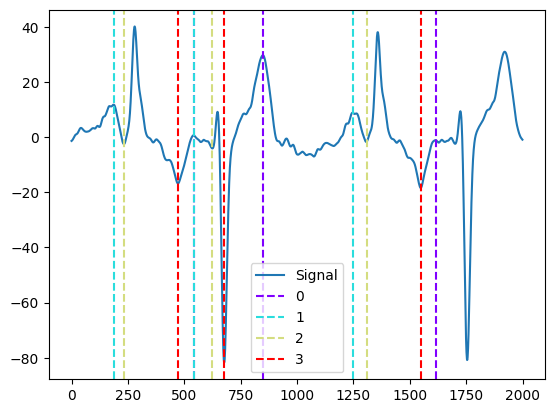

In [20]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks (0,1,2,3)
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_cleaned[:2000])

In [21]:
t_peak = waves_peak['ECG_T_Peaks']
p_peak = waves_peak['ECG_P_Peaks']
q_peak = waves_peak['ECG_Q_Peaks']
s_peak = waves_peak['ECG_S_Peaks']

In [22]:
rpeaks

array([  280,   647,  1358,  1724,  2434,  2801,  3512,  3878,  4589,
        4955,  5666,  6033,  6743,  7110,  7820,  8187,  8897,  9264,
        9975, 10341, 11051, 11418, 12128, 12496, 13206, 13573, 14283,
       14650, 15360, 15727, 16437, 16804, 17514, 17881, 18591, 18959,
       19668, 20035, 20746, 21113, 21822, 22190, 22900, 23266, 23977,
       24344, 25054, 25421, 26131, 26498, 27208, 27575, 28285, 28652,
       29362, 29729, 30440, 30807, 31517, 31884, 32594, 32961, 33671,
       34038, 34748, 35115, 35825, 36193, 36902, 37269, 37979, 38346,
       39056, 39423, 40133, 40501, 41211, 41577, 42288, 42655])

In [33]:
pr = []
qt = []
qrs = []


In [34]:
for i in range(len(rpeaks)):
    p_index = p_peak[i]
    r_index = rpeaks[i]
    q_index = q_peak[i]
    s_index = s_peak[i]
    t_index = t_peak[i]
    if np.isnan(p_index) or np.isnan(r_index) or np.isnan(q_index) or np.isnan(s_index) or np.isnan(t_index):
        continue
    pr.append(q_index - p_index)
    qt.append(t_index - q_index)
    qrs.append(s_index - q_index)


In [39]:
avg_pr = np.average(pr)

In [41]:
avg_qrs = np.average(qrs)

In [42]:
avg_qt = np.average(qt)

In [77]:
avg_pr # average P-R interval

46.94285714285714

In [78]:
avg_qrs # avergae QRS width

150.07142857142858

In [79]:
avg_qt # average QT interval

270.27142857142854

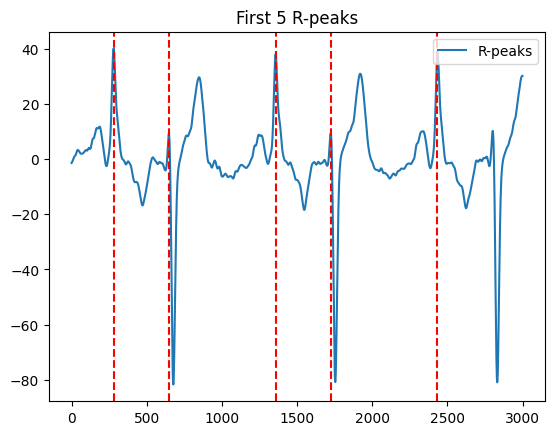

In [80]:
# Zooming into the first 5 R-peaks
nk.events_plot(rpeaks[:5], ecg_cleaned[:3000])

# Add title and legend
plt.title('First 5 R-peaks')
plt.legend(['R-peaks'], loc='upper right')

# Show the plot
plt.show()

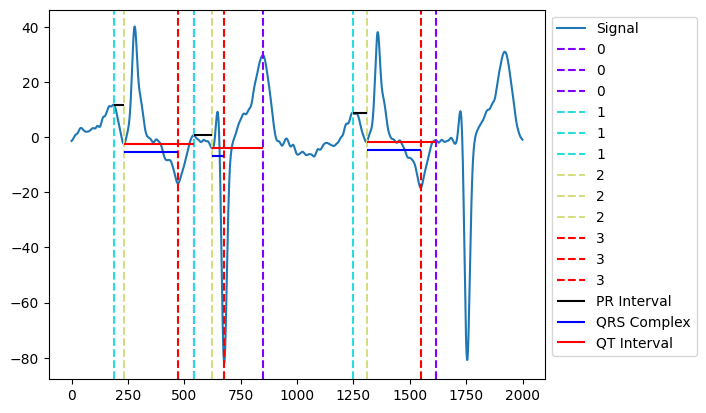

In [82]:
import matplotlib.pyplot as plt
import numpy as np


# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=fs, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P_peaks, Q_peaks and S_peaks (0,1,2,3)
nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                waves_peak['ECG_P_Peaks'][:3],
                waves_peak['ECG_Q_Peaks'][:3],
                waves_peak['ECG_S_Peaks'][:3]], ecg_cleaned[:2000])


# Adding PQ, QRS, QT segment lines manually
for i in range(3): # Loop for the first 3 peaks
    p_peak = waves_peak['ECG_P_Peaks'][i]
    q_peak = waves_peak['ECG_Q_Peaks'][i]
    s_peak = waves_peak['ECG_S_Peaks'][i]
    t_peak = waves_peak['ECG_T_Peaks'][i]

    # Ensure peaks exist and are within first 2000 points
    if any(np.isnan(peak) or peak > 2000 for peak in [p_peak, q_peak, s_peak, t_peak]):
        continue

    # Draw horizontal line from P to Q for PR interval
    plt.hlines(y=ecg_cleaned[int(p_peak)], xmin=p_peak, xmax=q_peak, color='k', label='PR Interval' if i == 0 else "")

    # Draw horizontal line from Q to S for QRS complex
    plt.hlines(y=ecg_cleaned[int(q_peak)] - 2.9, xmin=q_peak, xmax=s_peak, color='b', label='QRS Complex' if i == 0 else "")

    # Draw horizontal line from Q to T for QT interval
    plt.hlines(y=ecg_cleaned[int(q_peak)], xmin=q_peak, xmax=t_peak, color='r', label='QT Interval' if i == 0 else "")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Show the plot
plt.show()
